<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción-al-Decision-Tree-(o-Árboles-de-Decisión)" data-toc-modified-id="Introducción-al-Decision-Tree-(o-Árboles-de-Decisión)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción al <em>Decision Tree</em> (o Árboles de Decisión)</a></span></li><li><span><a href="#Ajuste-del-modelo-variables-estandarizadas-y-codificadas" data-toc-modified-id="Ajuste-del-modelo-variables-estandarizadas-y-codificadas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ajuste del modelo variables estandarizadas y codificadas</a></span></li></ul></div>

In [156]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Introducción al *Decision Tree* (o Árboles de Decisión)

Aunque estemos haciendo una regresión logística, este algoritmo funciona igual el problemas de regresión lineal y logística. De todas formas, os dejamos aquí un pequeño recordatorio de cuál era la nomenclatura de los árboles de decisión:

![nomenclatura](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/decision-tree-nomenclatura.png?raw=true)


Cosas importantes a tener en cuenta: 

- Este tipo de aproximación no tiene porque incluir necesariamente todas las variables en su modelo, buscará los modelos más parsimoniosos, es decir, aquellos que nos den el mejor resultado con el menor número de pasos posibles. 

- Las métricas que usaremos para evaluar si nuestro modelo es bueno prediciendo o no son las mismas que en los modelos de regresión logística. 

- Este algoritmo tiene por defecto los siguientes hiperparámetros:

    - `criterion`='gini'

    - `splitter`='best'

    - `max_depth`=None

    - `min_samples_split`=2

    - `min_samples_leaf`=1

    - `min_weight_fraction_leaf`=0.0

    - `max_features`=None

    - `random_state`=None

    - `max_leaf_nodes`=None

    - `min_impurity_decrease`=0.0

    - `min_impurity_split`=None

    - `ccp_alpha`=0.0

    De entre todos ellos, los más importantes son aquellos que detienen el crecimiento del árbol (condiciones de *stop*):

    - `max_depth`: profundidad máxima que puede alcanzar el árbol.

    - `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento *ceil*(*min_samples_split* * *n_samples*).

    - `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento *ceil*(*min_samples_split* * *n_samples*).

    - `max_leaf_nodes`: número máximo de nodos terminales.
    
    - `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.


Vale... son muchas cosas, pero solo nos centraremos en estos 5 hiperparámetros, pero.. ¿Cómo definimos sus valores? Pongámonos manos a la obra para entenderlo mejor. 



Igual que en las lecciones anteriores, en este jupyter solo usaremos dos set de datos:  

- El de las variables codificadas y estandarizadas

- El de las variables codificadas y sin estandarizar. 

Peeero .... 👇🏽👇🏽

📌 **NOTA**  El ejercicio de la clase invertida, será ajustar el algoritmo de *Decision Tree* con esos conjuntos de datos (los datos con la corrección del desbalanceo). Esta dinámica la seguiremos a lo largo de las siguientes lecciones, de tal forma que iremos comparando cada modelo en función de su preprocesamiento.  


#  Ajuste del modelo variables estandarizadas y codificadas

📌 **NOTA** Hasta ahora habíamos estado ejecutando dos modelos, uno con los datos estandarizados y otro con los modelos sin estandarizar. Sin embargo, nos hemos dado cuenta que obteníamos mejores datos cuando teníamos los datos estandarizados, por esto, a partir de ahora, ejecutaremos los modelos solo con los datos estandarizados (tanto el el *Decision Tree* como en el *Random Forest* que veremos en la siguiente lección). 

In [157]:
df_esta = pd.read_csv("../files/titanic_esta_enco.csv", index_col = 0)
df_esta.head()

,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
1,1,1,1,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0
2,1,3,1,-0.191925,-0.801644,-0.643861,0,0,1,1,0,1,0,0,1
3,1,1,1,0.558909,2.461550,0.757803,0,0,1,1,0,1,0,1,0
4,0,3,0,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1


In [158]:
# separamos los datos en X e y

X1 = df_esta.drop("survived", axis = 1)
y1 = df_esta["survived"]

In [159]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [160]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)



DecisionTreeClassifier(random_state=0)

Una vez entrenado el árbol, se puede representar mediante la combinación de las funciones plot_tree(). La función plot_tree() dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo.

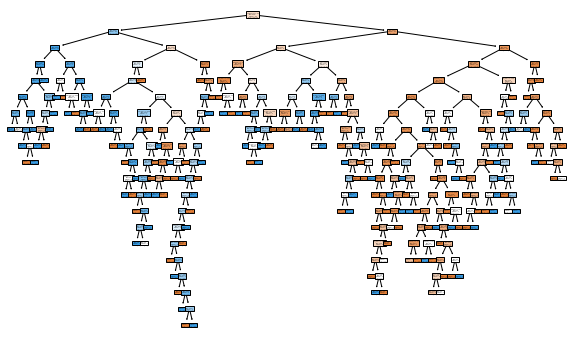

In [161]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

Este sería nuestro árbol de decisión si no le pusieramos ningún límite a sus hiperparámetros, pero seamos sinceros, esto es muy complejo de interpretar, y por puro azar nuestro modelo podría acertar sus predicciones. Además podríamos tener algo de *overfitting* resultado de que nuestro modelo se haya aprendido de memoria los datos de entrenamiento, teniendo como consecuencia que haga malas predicciones. 

**Entonces... ¿Cómo seleccionamos los hiperparámetros?**

- `max_depth`: teóricamente la profundidad que puede alcanzar un árbol de decisión es una menos que el número de muestras de entrenamiento, pero ningún algoritmo nos permitirá llegar a este punto ya que tendríamos problemas de *overfitting*.

    También es malo tener una profundidad muy baja porque tu modelo no se ajustará lo suficiente para encontrar el mejor valor, ya que podríamos tener problemas de *underfitting*

    Lo ideal, dejar que el modelo decida primero la profundidad máxima y luego, comparando las puntuaciones de *train* y de *test*, buscar si hay *overfitting* o *underfitting* y, dependiendo del grado, disminuir o aumentar la profundidad máxima.

- `max_features`: la raíz cuadrada del número de variables predictoras

In [162]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train1.columns))
max_features

3.7416573867739413

In [163]:

# max depth

print(arbol.tree_.max_depth)

19


In [164]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [165]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [166]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.729032,0.640625,0.683333,0.661290,0.435875,test,Decission Tree Esta I
1,0.977419,1.000000,0.946154,0.972332,0.953283,train,Decission Tree Esta I


---------------
Recordemos cuando había *overfitting* o *overfitting* 

- Si los valores del *train* son MUCHO MEJOR que los del *test* --> ***overfitting***. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos.



- Si los valores del *train* son MUCHO PEOR que los del *test* --> ***underfitting***. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del *train*.
-------------------

Aquí tenemos un claro ejemplo de *overfitting* y es que las métricas del *train* son muchísimo mejores que las del test!! ¿Entonces ahora que hacemos? Recordad que estabamos haciendo esto para decidir la profundidad que le tenemos que dar a nuestro modelo, en este conexto: 

- Si tenemos *overfitting* tendremos que reducir la profundidad del modelo

- Si tenemos *underfitting* tendremos que aumentar la profundidad del modelo. 

La siguiente pregunta que podría pasar por nuestra cabeza es, ¿qué valor le damos?, ¿tenemos que hacer ejecutar el modelo una y otra vez hasta encontrar la mejor opción? La respuesta es no!! En Python tenemos una herramienta llamada `GridSearchCV` que nos permite ajustar un modelo pasándole varios valores de hiperparámetros vemaos como funciona. 

In [167]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4, 6, 10, 12, 14], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 


In [168]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla


In [169]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

Recordemos que el *GridSearch* lo que hace es ejecutar todas las posibles combinaciones de hiperparámetros que le hemos dado a nuestro modelo. Después del *GridSearch* usaremos el método `best_estimator_` para saber cuál de todos los modelos que se han ejecutado es el mejor. 

In [170]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=4, max_features=2, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

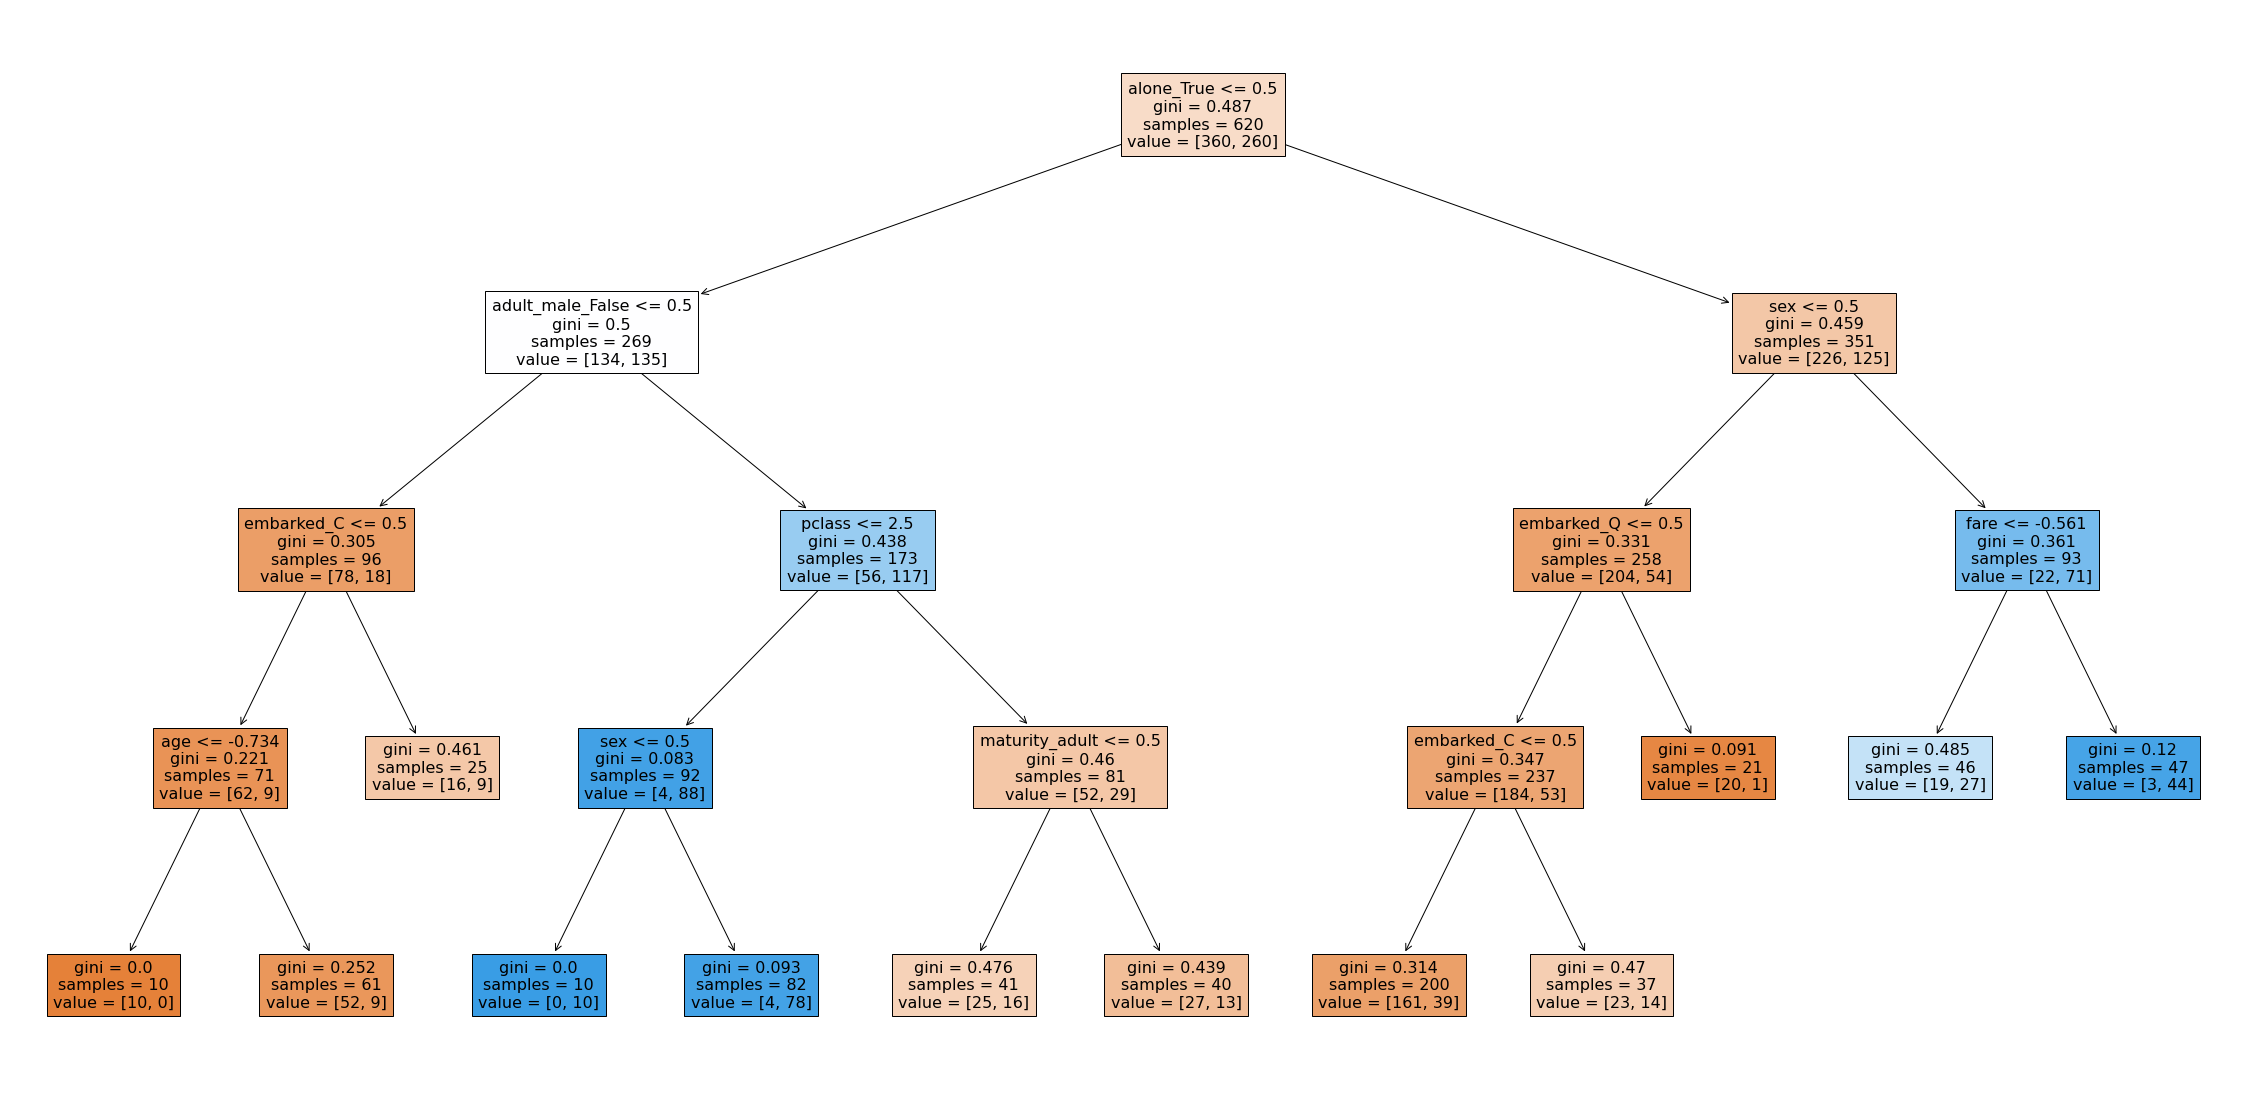

In [171]:
# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

Una vez que tenemos nuestro árbol terminado, el siguiente paso es el de predecir, para saber cómo de bueno es nuestro modelo 👇🏽

In [172]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [173]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2



,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.825806,0.883721,0.633333,0.737864,0.612679,test,Decision tree Esta II
1,0.795161,0.859459,0.611538,0.714607,0.561825,train,Decision tree Esta II


In [174]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.729032,0.640625,0.683333,0.661290,0.435875,test,Decission Tree Esta I
1,0.977419,1.000000,0.946154,0.972332,0.953283,train,Decission Tree Esta I
0,0.825806,0.883721,0.633333,0.737864,0.612679,test,Decision tree Esta II
1,0.795161,0.859459,0.611538,0.714607,0.561825,train,Decision tree Esta II


In [175]:
# si recodáis, en la clase de métricas guardamos en un csv los resultados de las métricas del modelo
# vamos a cargar ese csv para comparar todos los modelos que hemos hecho, y comparar cuál de ellos es el mejor

df_logistic_results = pd.read_csv("../files/resultados_titanic_logistica.csv", index_col = 0)
df_logistic_results


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.670968,1.000000,0.150000,0.260870,0.177847,test,Regresión logistica
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica
0,0.767742,0.700000,0.700000,0.700000,0.510526,test,Regresión logistica Esta
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica Esta


In [176]:
# concatenamos todos los resultados

df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.670968,1.000000,0.150000,0.260870,0.177847,test,Regresión logistica
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica
2,0.767742,0.700000,0.700000,0.700000,0.510526,test,Regresión logistica Esta
3,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica Esta
4,0.729032,0.640625,0.683333,0.661290,0.435875,test,Decission Tree Esta I
5,0.977419,1.000000,0.946154,0.972332,0.953283,train,Decission Tree Esta I
6,0.825806,0.883721,0.633333,0.737864,0.612679,test,Decision tree Esta II
7,0.795161,0.859459,0.611538,0.714607,0.561825,train,Decision tree Esta II


En este *dataframe* tenemos muchos resultados, pero sabemos que algunos de ellos no son buenos, como es el caso del modelo de `Regresión logística`(el primero) o el de `Decission Tree Esta I` (el tercero), esto es porque tenemos mucho *overfitting* en nuestros modelos. Por lo tanto, vamos a eliminar estas filas para poder comparar los resultados mejor: 

In [177]:
df_DT_LR_results.drop([0,1,4,5], axis = 0, inplace = True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.767742,0.700000,0.700000,0.700000,0.510526,test,Regresión logistica Esta
3,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica Esta
6,0.825806,0.883721,0.633333,0.737864,0.612679,test,Decision tree Esta II
7,0.795161,0.859459,0.611538,0.714607,0.561825,train,Decision tree Esta II


In [178]:
# pongamos un poco de color a nuestro dataframe para ver la comparación de los datos de una forma un poco más amigable. 
df_DT_LR_results.style.background_gradient(cmap='seismic')


,accuracy,precision,recall,f1,kapppa,set,modelo
2,0.767742,0.700000,0.700000,0.700000,0.510526,test,Regresión logistica Esta
3,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica Esta
6,0.825806,0.883721,0.633333,0.737864,0.612679,test,Decision tree Esta II
7,0.795161,0.859459,0.611538,0.714607,0.561825,train,Decision tree Esta II


In [179]:
# ademas vamos a guardar este dataframe en un csv para 

df_DT_LR_results.to_csv("../files/resultados_titanic_LR_DT.csv")

------------
**🤔 Es vuestro turno 🤔**

¿Cuál de todos los modelos que hemos ejecutado hasta ahora creéis que es el que mejor tiene capacidad predictiva? Lo discutiremos en la clase de mañana después del kahoot!

------------


Por último, y no menos importante, recordad que este tipo de algoritmo nos permitía extraer la importancia de cada una de las variables de nuestro modelo. Pongámonos manos a la obra!!!

In [180]:

# vamos a crearnos un dataframe 
importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_esta


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,sex,0.349104
0,pclass,0.256351
10,adult_male_False,0.245083
13,alone_True,0.053737
3,fare,0.047102
5,embarked_C,0.034156
6,embarked_Q,0.009929
2,age,0.003107
8,maturity_adult,0.001432
4,num_familiar,0.000000


Si recordamos, teníamos columnas categóricas que habíamos convertido en *dummies*, lo que significaba que se generaron tantas columnas nuevas como categorías. A la hora de calcular de importancia de cada una de las variables, nos lo hace por cada columna, pero en realidad no sabemos el efecto global de cada una de las variables categóricas en conjunto. Por este motivo, vamos a agrupar cada categoría en un único valor:

In [181]:
# lo primero que hacemos es crearnos un dataframe con los valores solo de adulto, es decir, la primera y antepenúltima fila
adulto = importancia_predictores_esta.iloc[[2, -2]]
adulto

,predictor,importancia
10,adult_male_False,0.245083
11,adult_male_True,0.000000


In [182]:
# hacemos lo mismo para embarque
embarque = importancia_predictores_esta.loc[[5,7]]
embarque

,predictor,importancia
5,embarked_C,0.034156
7,embarked_S,0.000000


In [183]:
# y para maturity
madurez = importancia_predictores_esta.loc[[8,9]]
madurez

,predictor,importancia
8,maturity_adult,0.001432
9,maturity_child,0.000000


In [184]:
# y por último para saber si viajaban solos o no
# hacemos lo mismo para embarque
solos = importancia_predictores_esta.loc[[12,13]]
solos

,predictor,importancia
12,alone_False,0.000000
13,alone_True,0.053737


In [185]:
# eliminamos esas filas del dataframe donde tenemos los valores de importancia

importancia_predictores_esta.drop(adulto.index, inplace = True)
importancia_predictores_esta.drop(madurez.index, inplace = True)
importancia_predictores_esta.drop(embarque.index, inplace = True)
importancia_predictores_esta.drop(solos.index, inplace = True)

In [186]:
importancia_predictores_esta

,predictor,importancia
1,sex,0.349104
0,pclass,0.256351
3,fare,0.047102
6,embarked_Q,0.009929
2,age,0.003107
4,num_familiar,0.000000


In [187]:
# nos creamos nuevas filas con el resultado de la suma

importancia_predictores_esta.loc[5] =  ["adult_male", adulto["importancia"].sum()]
importancia_predictores_esta.loc[6] =  ["maturity", madurez["importancia"].sum()]
importancia_predictores_esta.loc[7] =  ["embark", embarque["importancia"].sum()]
importancia_predictores_esta.loc[8] =  ["alone", solos["importancia"].sum()]

# ordenamos el df

importancia_predictores_esta.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores_esta

,predictor,importancia
1,sex,0.349104
0,pclass,0.256351
5,adult_male,0.245083
8,alone,0.053737
3,fare,0.047102
7,embark,0.034156
2,age,0.003107
6,maturity,0.001432
4,num_familiar,0.000000


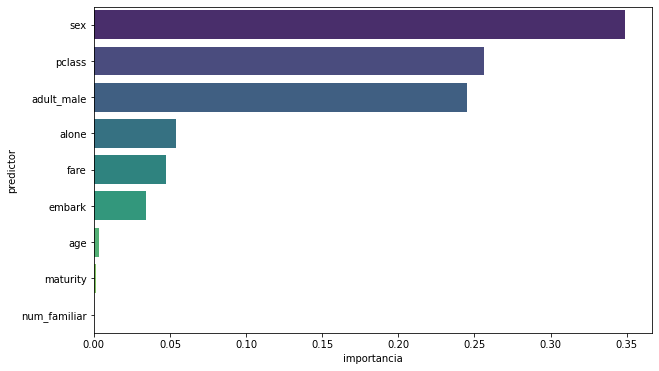

In [188]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="viridis");
plt.show()